In [ ]:
'/content/drive/MyDrive/Clean Code/CO2 Emissions_Canada.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

This data was created by Debajyoti Podder in 2020.

I was able to access it through Kaggle('https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles')

The study of CO2 emissions by vehicles aligns with UNSDG 13 (Climate Action) by helping reduce greenhouse gas emissions and mitigate climate change. It also supports UNSDG 11 (Sustainable Cities) by promoting cleaner air and sustainable transport. Additionally, it contributes to UNSDG 7 (Clean Energy) by encouraging fuel efficiency and alternative energy use, and UNSDG 9 (Industry & Innovation) by driving advancements in green vehicle technology.



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Clean Code/CO2 Emissions_Canada.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              998 non-null    object 
 1   Model                             998 non-null    object 
 2   Vehicle Class                     998 non-null    object 
 3   Engine Size(L)                    998 non-null    float64
 4   Cylinders                         998 non-null    int64  
 5   Transmission                      998 non-null    object 
 6   Fuel Type                         998 non-null    object 
 7   Fuel Consumption City (L/100 km)  998 non-null    float64
 8   Fuel Consumption Hwy (L/100 km)   998 non-null    float64
 9   Fuel Consumption Comb (L/100 km)  998 non-null    float64
 10  Fuel Consumption Comb (mpg)       998 non-null    int64  
 11  CO2 Emissions(g/km)               998 non-null    int64  
dtypes: float

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)


Missing Values per Column:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates_count}")

# Remove duplicates if any
df = df.drop_duplicates()



Number of Duplicate Rows: 0


In [ ]:
shape=df.shape
print("The shape of dataset:",shape)

The shape of dataset: (998, 12)


In [ ]:
print("Dataset Preview:")
df.head()

Dataset Preview:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


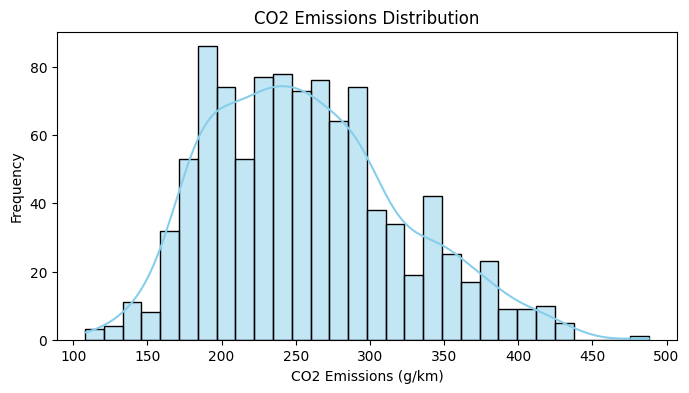

In [ ]:
# Set figure size
plt.figure(figsize=(8, 4))

# Create the countplot for CO2 Emissions
sns.histplot(data=df, x="CO2 Emissions(g/km)", bins=30, kde=True, color="skyblue")

# Add labels and title
plt.title("CO2 Emissions Distribution")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

1. The highest bars (peaks) indicate that most vehicles have CO2 emissions between 200 to 300 g/km.
2. The lowest emissions start around 100 g/km, and the highest go up to 500 g/km.
3.Most vehicles in your dataset have moderate CO2 emissions.
4.High-emission vehicles exist but are less common.

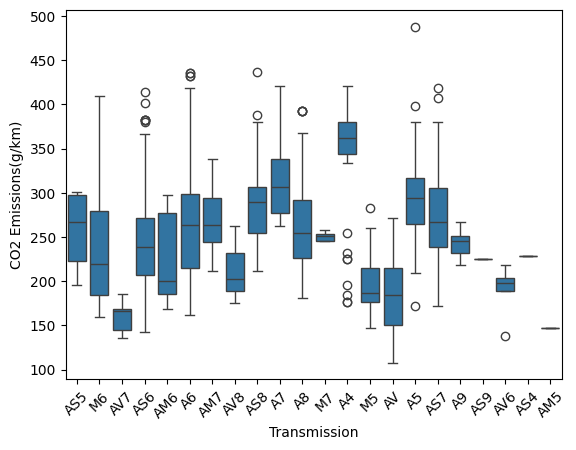

In [ ]:
sns.boxplot(data=df, x="Transmission", y="CO2 Emissions(g/km)")
plt.xticks(rotation=45)
plt.show()


Automatic transmissions with more gears (e.g., A8, AM8) might produce more emissions.

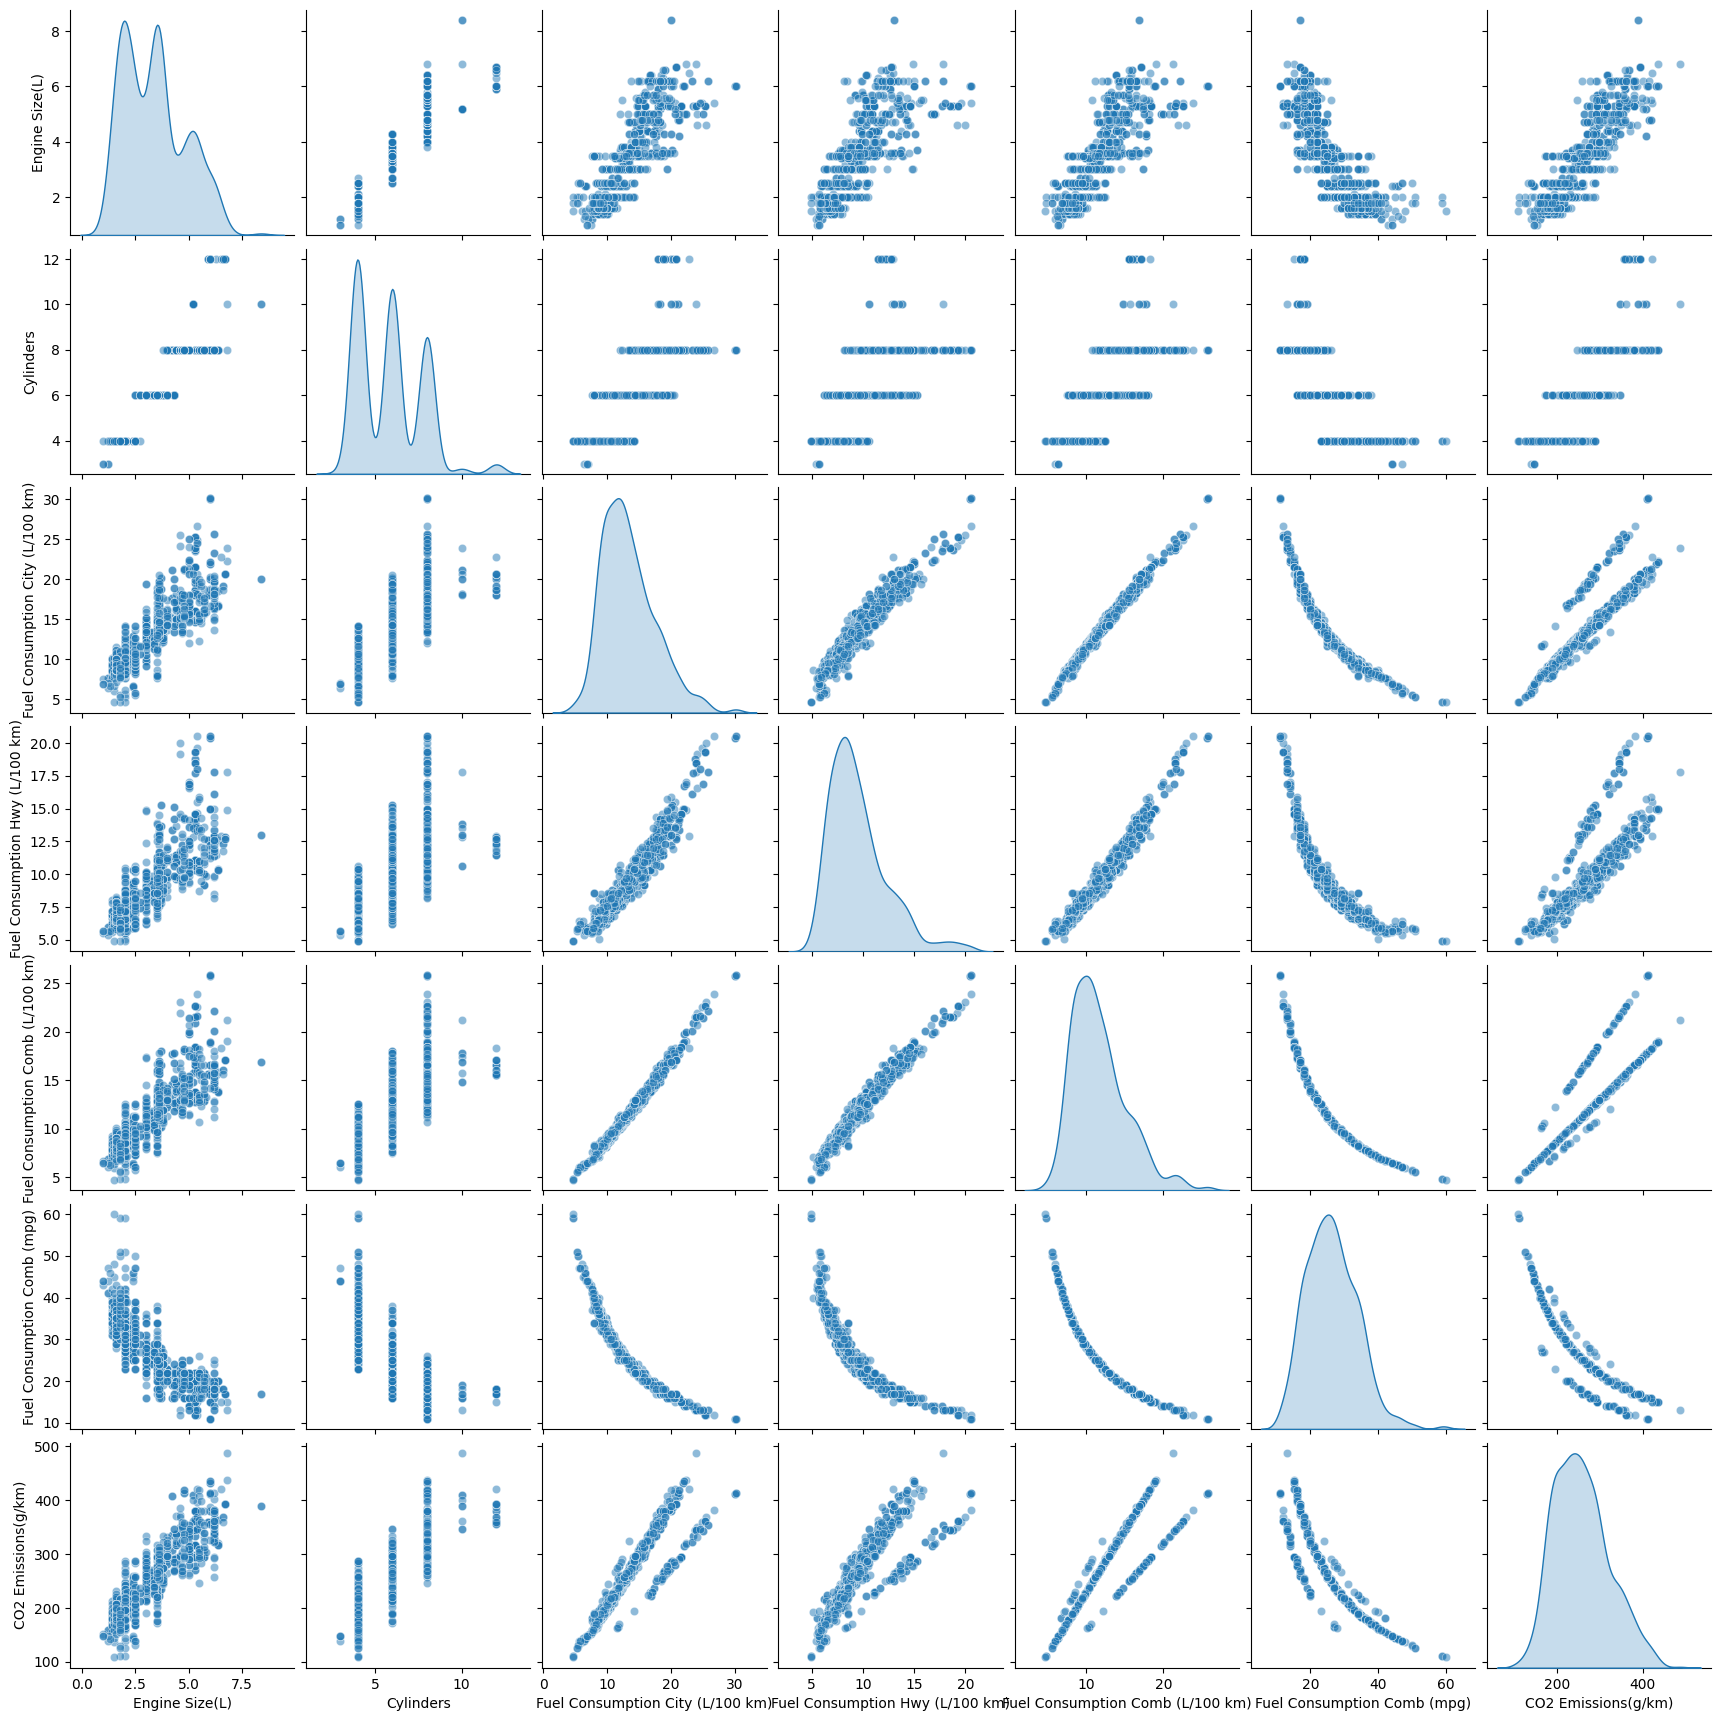

In [ ]:
# Selecting only numerical columns for the pair plot
numerical_cols = [
    "Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)"
]

# Creating the pair plot
sns.pairplot(df[numerical_cols], diag_kind="kde", plot_kws={'alpha': 0.5})

# Show the plot
plt.show()


MODEL FROM SCRATCH

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=['CO2 Emissions(g/km)']).values  # Convert to numpy array
y = df['CO2 Emissions(g/km)'].values


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Ensure X is a DataFrame before splitting
X = df.drop(columns=["CO2 Emissions(g/km)"])  # Drop target column
y = df["CO2 Emissions(g/km)"]  # Target variable

# Step 2: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Convert X_train and X_test back to DataFrame (if they became NumPy arrays)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Step 3: Identify Categorical Columns (Fixing the AttributeError)
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Detected Categorical Columns:", categorical_cols)

# Step 4: Convert categorical columns to strings (Ensure Proper Encoding)
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Step 5: Apply One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Step 6: Align Test Set Columns with Train Set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Final Training Set Shape:", X_train.shape)
print("Final Testing Set Shape:", X_test.shape)


Detected Categorical Columns: ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
Final Training Set Shape: (798, 633)
Final Testing Set Shape: (200, 633)


DATA AFTER HOT-ENCODING THE CATEGORYCAL DATA

In [ ]:
import pandas as pd

def display_encoded_data(X_train, X_test, y_train, y_test):
    """
    Display comprehensive information about the encoded datasets
    """
    # Create full datasets with target variable
    train_full = X_train.copy()
    train_full['CO2 Emissions(g/km)'] = y_train
    test_full = X_test.copy()
    test_full['CO2 Emissions(g/km)'] = y_test

    # Display information about the datasets
    print("\n=== Training Set ===")
    print(f"Shape: {train_full.shape}")
    print("\nFirst 5 rows:")
    print(train_full.head())
    print("\nBasic Statistics:")
    print(train_full.describe())
    print("\nColumn Names:")
    for i, col in enumerate(train_full.columns, 1):
        print(f"{i}. {col}")

    print("\n\n=== Testing Set ===")
    print(f"Shape: {test_full.shape}")
    print("\nFirst 5 rows:")
    print(test_full.head())
    print("\nBasic Statistics:")
    print(test_full.describe())

    # Check for any missing values
    print("\n=== Missing Values Check ===")
    print("\nTraining Set Missing Values:")
    print(train_full.isnull().sum().sum())
    print("\nTesting Set Missing Values:")
    print(test_full.isnull().sum().sum())

    # Display memory usage
    print("\n=== Memory Usage ===")
    print("\nTraining Set Memory Usage:")
    print(f"{train_full.memory_usage().sum() / 1024**2:.2f} MB")
    print("\nTesting Set Memory Usage:")
    print(f"{test_full.memory_usage().sum() / 1024**2:.2f} MB")

    return train_full, test_full

# Call the function
train_full, test_full = display_encoded_data(X_train, X_test, y_train, y_test)


=== Training Set ===
Shape: (798, 634)

First 5 rows:
     Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
743             2.1          4                               8.5   
286             3.6          6                              12.8   
165             3.6          6                              12.9   
959             2.5          4                              14.2   
493             2.4          4                              10.6   

     Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
743                              5.7                               7.2   
286                              8.6                              10.9   
165                              8.2                              10.8   
959                             10.4                              12.5   
493                              7.9                               9.4   

     Fuel Consumption Comb (mpg)  Make_ALFA ROMEO  Make_ASTON MARTIN  \
743                

NUMBER OF DATA AFTER HOT-ENCODING

In [ ]:
# Display data types of training set columns
print("\n=== Training Set Data Types ===")
print(X_train.dtypes)

print("\n=== Number of columns of each type ===")
print(X_train.dtypes.value_counts())


=== Training Set Data Types ===
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
                                     ...   
Transmission_M6                        bool
Transmission_M7                        bool
Fuel Type_E                            bool
Fuel Type_X                            bool
Fuel Type_Z                            bool
Length: 633, dtype: object

=== Number of columns of each type ===
bool       627
float64      4
int64        2
Name: count, dtype: int64


Training MSE: 16.4152, Training R²: 0.9961
Testing MSE: 147.2631, Testing R²: 0.9599


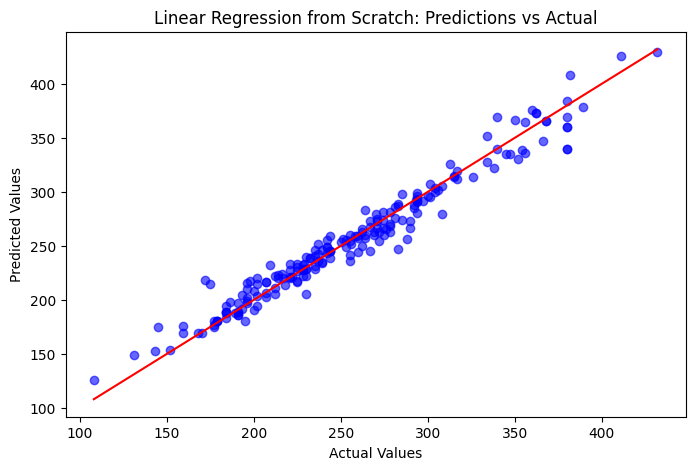

In [ ]:
# Manually standardize features
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train_scaled, mean, std = standardize(X_train)
X_test_scaled = (X_test - mean) / std

# Add bias term (intercept)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize parameters (weights)
n_features = X_train_scaled.shape[1]
weights = np.zeros(n_features)

# Define hyperparameters
learning_rate = 0.01
epochs = 1000
m = len(y_train)

# Gradient Descent
for epoch in range(epochs):
    y_pred = np.dot(X_train_scaled, weights)
    error = y_pred - y_train

    gradients = (1/m) * np.dot(X_train_scaled.T, error)
    weights -= learning_rate * gradients

# Make predictions
y_train_pred = np.dot(X_train_scaled, weights)
y_test_pred = np.dot(X_test_scaled, weights)

# Compute MSE manually
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Compute R² manually
def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Print Evaluation Metrics
print(f"Training MSE: {mse(y_train, y_train_pred):.4f}, Training R²: {r2_score_manual(y_train, y_train_pred):.4f}")
print(f"Testing MSE: {mse(y_test, y_test_pred):.4f}, Testing R²: {r2_score_manual(y_test, y_test_pred):.4f}")

# Plot Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression from Scratch: Predictions vs Actual")
plt.show()

PRIMARY MODEL


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# Handle missing values (if any)
df = df.dropna()

# Define features (X) and target variable (y)
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Apply One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align Test Set Columns with Train Set (Important!)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Standardize features for models sensitive to scaling (e.g., Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train, y_train)  # No scaling required for RandomForest

# Make predictions
y_pred_lr = linear_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  - R-squared (R²): {r2:.4f}\n")
    return r2

r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Identify best model
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"Best Model: {best_model}")

Linear Regression Performance:
  - Mean Absolute Error (MAE): 6.8519
  - Root Mean Squared Error (RMSE): 11.0778
  - R-squared (R²): 0.9666

Random Forest Regression Performance:
  - Mean Absolute Error (MAE): 1.8056
  - Root Mean Squared Error (RMSE): 6.2566
  - R-squared (R²): 0.9893

Best Model: Random Forest


HYPERPARAMETER OPTIMZATION


In [ ]:
# Hyperparameter Tuning for Ridge Regression
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train)

# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get best parameters and best scores
best_ridge_params = ridge_grid_search.best_params_
best_ridge_score = ridge_grid_search.best_score_

best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

In [ ]:
# Print results
print("Best Hyperparameters for Ridge Regression:", best_ridge_params)
print("Best R² Score for Ridge Regression:", best_ridge_score)

print("Best Hyperparameters for Random Forest:", best_rf_params)
print("Best R² Score for Random Forest:", best_rf_score)

Best Hyperparameters for Ridge Regression: {'alpha': 1}
Best R² Score for Ridge Regression: 0.9746684687169818
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score for Random Forest: 0.989910134102662


FEATURE SELECTION


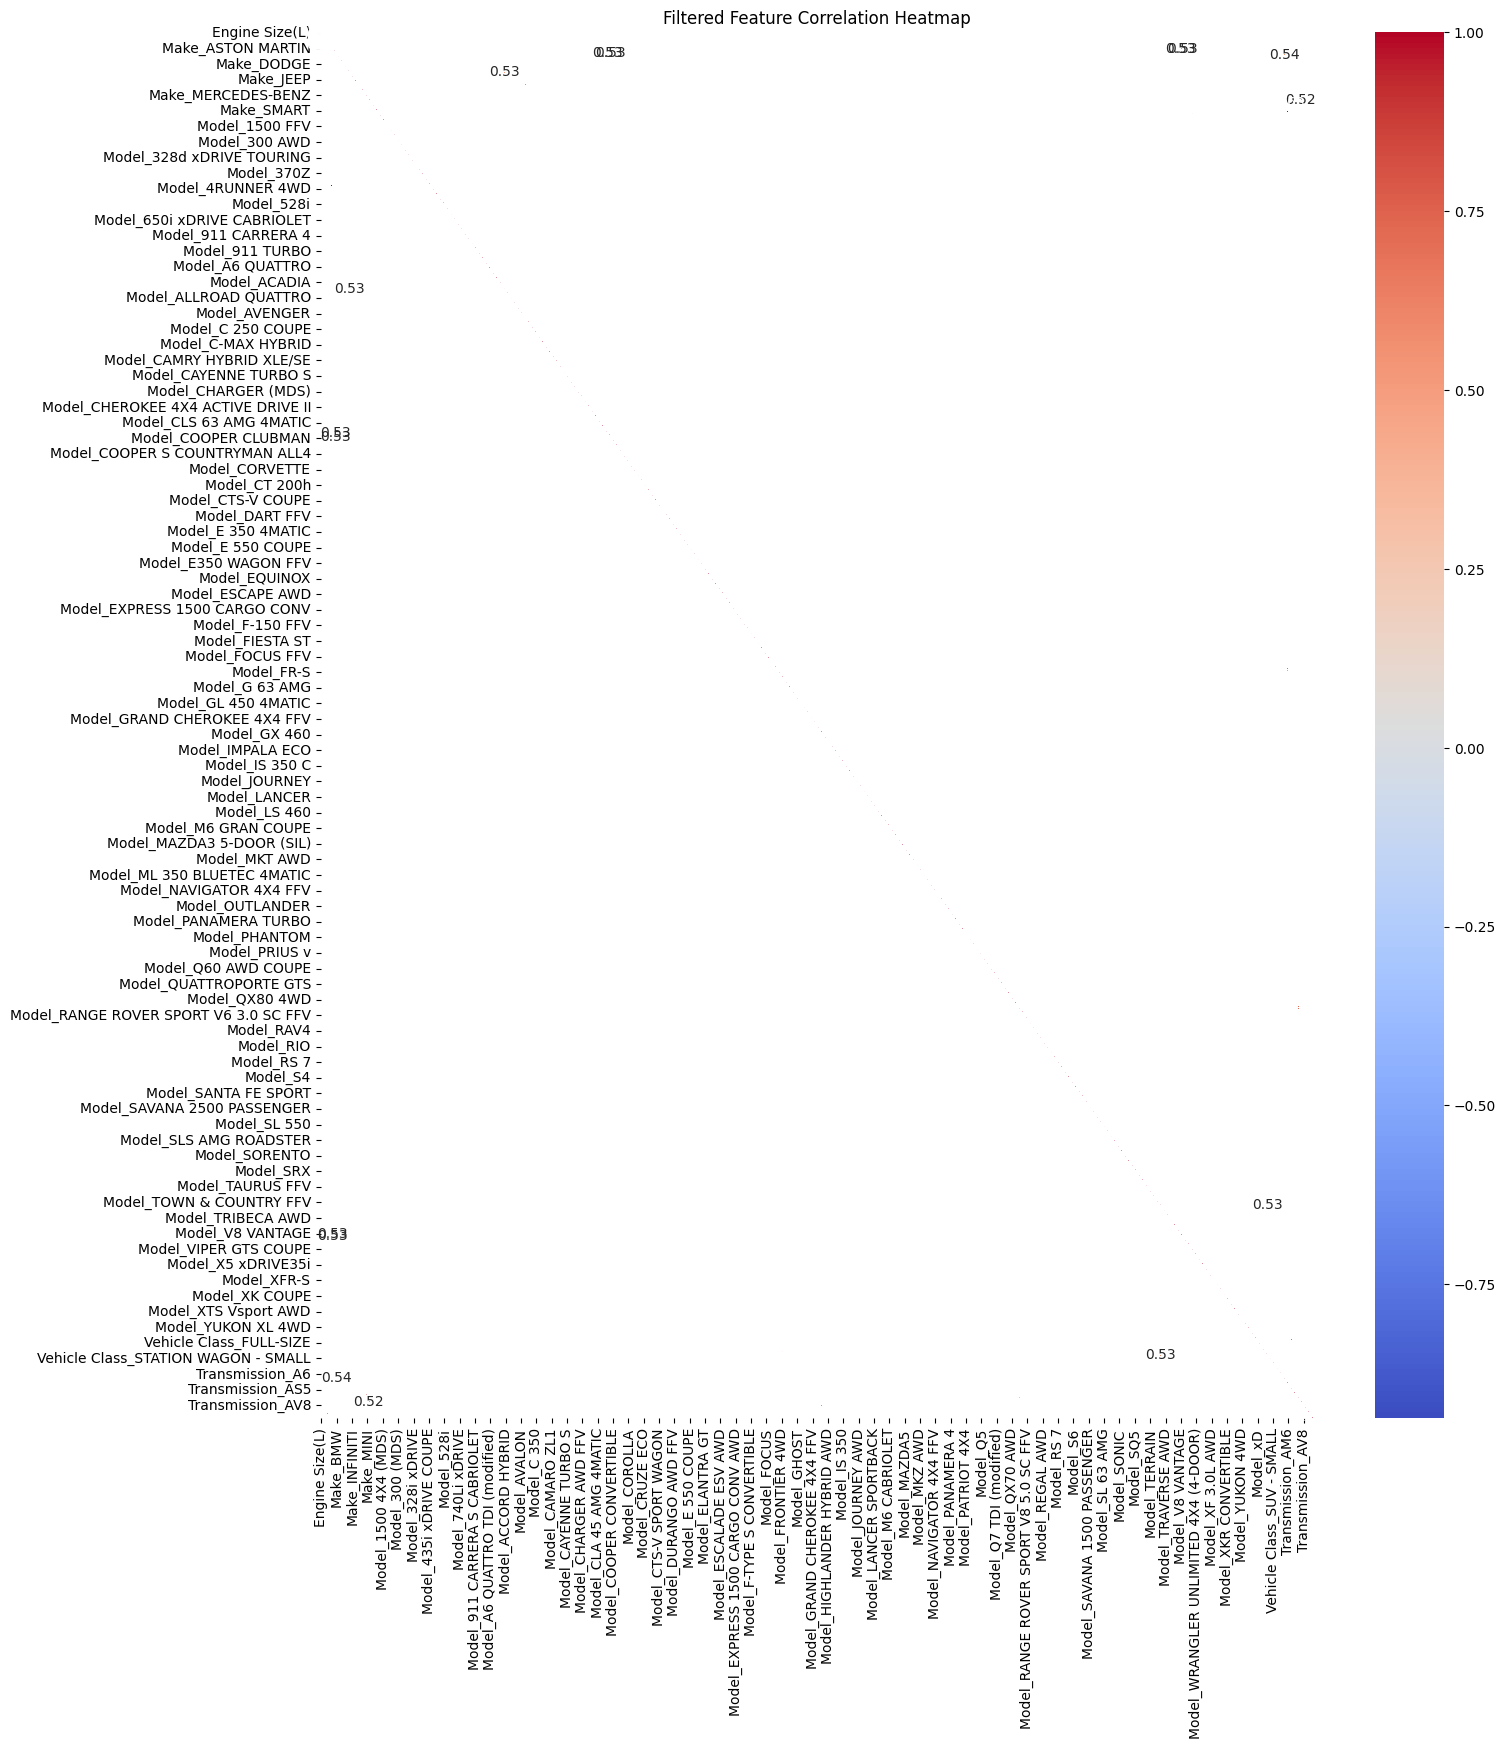

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Apply threshold: Keep only correlations above 0.5 (absolute)
filtered_corr = correlation_matrix[abs(correlation_matrix) > 0.5]

# Increase figure size (wider and taller)
plt.figure(figsize=(16, 18))  # Increased height from 12 to 18
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Filtered Feature Correlation Heatmap")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.show()


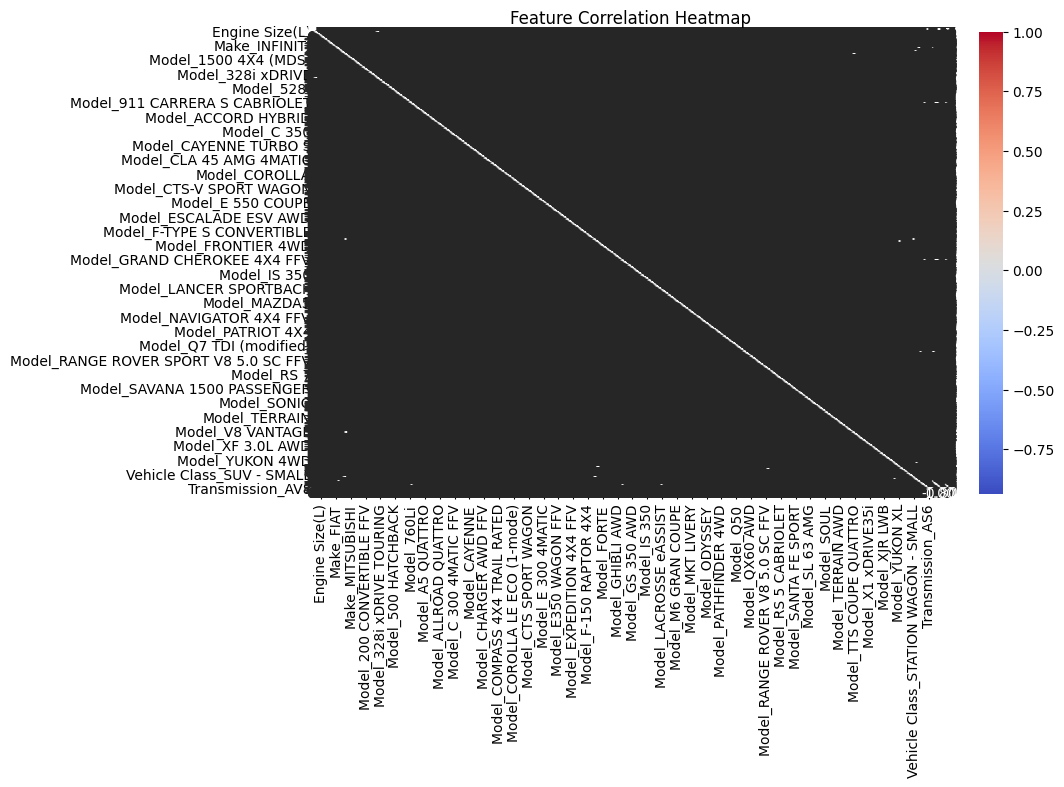

In [ ]:
# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Select features with strong correlation (absolute correlation > 0.5)
selected_features = important_features[important_features > 0.5].index.tolist()

# Remove target variable (CO2 Emissions)
selected_features.remove("CO2 Emissions(g/km)")

# Print selected features
print("Selected Features (Correlation > 0.5):\n", selected_features)


Selected Features (Correlation > 0.5):
 ['Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)', 'Cylinders']


FINAL MODEL

In [ ]:
#Selected features based on correlation analysis
selected_features = ['Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)', 'Cylinders']  # Example selected features
X = df[selected_features].values  # Convert to numpy array
y = df['CO2 Emissions(g/km)'].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and Evaluate Ridge Regression
best_ridge_params = {'alpha': 0.1}  # Using best hyperparameters from previous task
ridge = Ridge(**best_ridge_params)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Train and Evaluate Random Forest Regressor
best_rf_params = {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
rf_reg = RandomForestRegressor(**best_rf_params, random_state=42)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Function to evaluate models
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    print(f"\n {model_name} Performance:")
    print(f"  - Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
    print(f"  - Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  - Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

# Evaluate both models
evaluate_model(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge, "Optimized Ridge Regression")
evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "Optimized Random Forest")


 Optimized Ridge Regression Performance:
  - Train MAE: 14.2090 | Test MAE: 13.8427
  - Train RMSE: 21.7350 | Test RMSE: 20.7045
  - Train R²: 0.8890 | Test R²: 0.8832

 Optimized Random Forest Performance:
  - Train MAE: 2.4653 | Test MAE: 3.3077
  - Train RMSE: 7.2713 | Test RMSE: 9.9145
  - Train R²: 0.9876 | Test R²: 0.9732


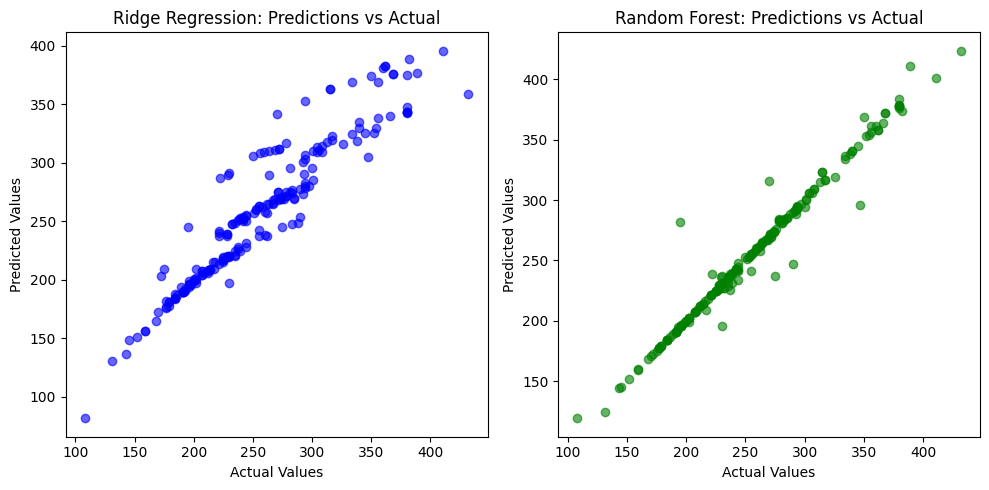

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_ridge, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Predictions vs Actual")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, color='green', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")

plt.tight_layout()
plt.show()

1. Random Forest outperformed Ridge Regression in predictive accuracy, achieving a higher R² score (0.9732 vs. 0.8832 on the test set).
2. Random Forest had lower errors, with a test RMSE of 9.9145 and MAE of 3.3077, compared to Ridge Regression’s RMSE of 20.7045 and MAE of 13.8427.
3. Ridge Regression showed better generalization, with less overfitting compared to Random Forest.
4. Random Forest provided significantly more accurate predictions, making it the better choice if predictive performance is the priority.
5. Ridge Regression remains useful for interpretability and cases where a simpler, more generalizable model is needed.